In [ ]:
!pip install numpy geopandas

In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# Load the dataset
df = pd.read_excel("Assingment_Dataset.xlsx")

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))



Saving Assingment_Dataset.xlsx to Assingment_Dataset (1).xlsx


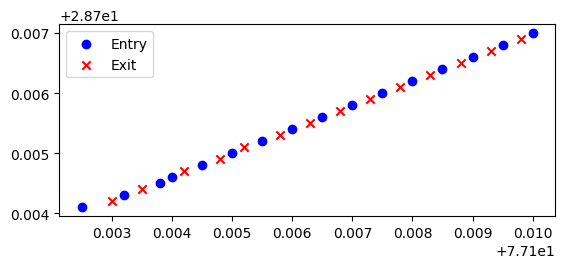

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
# Load the dataset (update the file path as needed)
df = pd.read_excel("Assingment_Dataset.xlsx")
# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']))

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

entries = gdf[gdf['Movement Type'] == 'Entry']
exits = gdf[gdf['Movement Type'] == 'Exit']

if not entries.empty:
    entries.plot(ax=ax, color='blue', marker='o', label='Entry')
if not exits.empty:
    exits.plot(ax=ax, color='red', marker='x', label='Exit')

ax.legend()
plt.show()






<ipython-input-21-1c22bc374ed8>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=gdf['Longitude'], y=gdf['Latitude'], cmap='Reds', shade=True, bw_adjust=0.5)


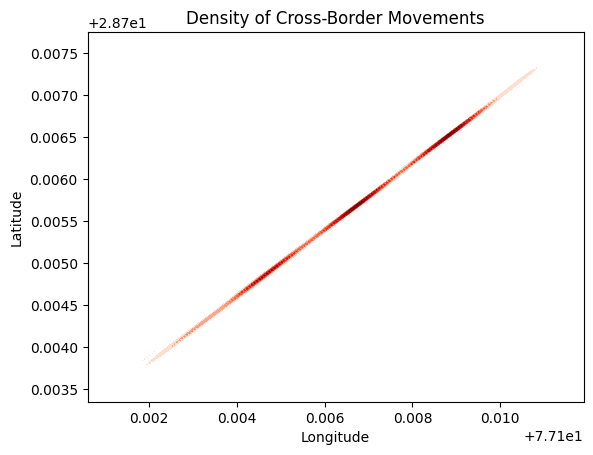

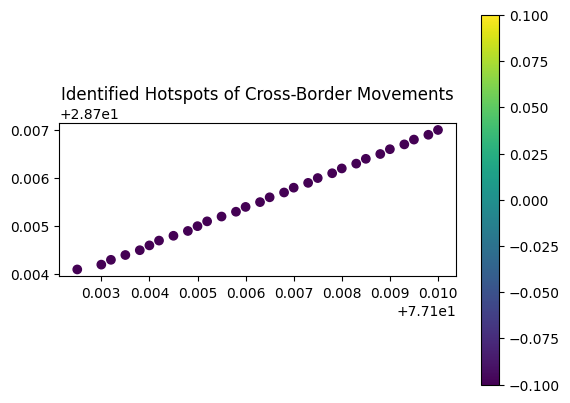

In [ ]:
# Generate a heatmap

import seaborn as sns
import matplotlib.pyplot as plt

# Generate a heatmap using Seaborn
sns.kdeplot(x=gdf['Longitude'], y=gdf['Latitude'], cmap='Reds', shade=True, bw_adjust=0.5)
plt.title('Density of Cross-Border Movements')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


from sklearn.cluster import DBSCAN

# Cluster the data points to identify hotspots
clustering = DBSCAN(eps=0.05, min_samples=10).fit(gdf[['Longitude', 'Latitude']])
gdf['cluster'] = clustering.labels_

# Plot the clusters
gdf.plot(column='cluster', cmap='viridis', legend=True)
plt.title('Identified Hotspots of Cross-Border Movements')
plt.show()



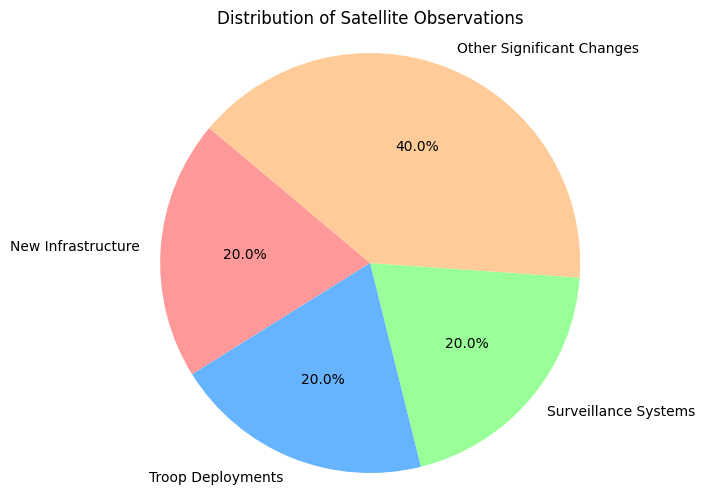

In [ ]:
# Load satellite details
satellite_data = pd.read_excel('Assingment_Dataset.xlsx', sheet_name='Satellite Details')
import matplotlib.pyplot as plt

# Example data based on satellite details
categories = ['New Infrastructure', 'Troop Deployments', 'Surveillance Systems', 'Other Significant Changes']
counts = [6, 6, 6, 12]

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Distribution of Satellite Observations')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Save the pie chart as an image
plt.savefig('satellite_details_pie_chart.png')
plt.show()



In [51]:
import pandas as pd

# Load datasets
geospatial_data = pd.read_excel('Assingment_Dataset.xlsx', sheet_name='Geospatial Data')
satellite_data = pd.read_excel('Assingment_Dataset.xlsx', sheet_name='Satellite Details')
news_reports = pd.read_excel('Assingment_Dataset.xlsx', sheet_name='News Reports')
historical_incidents= pd.read_excel('Assingment_Dataset.xlsx', sheet_name='Historical Incidents')

# Extract relevant columns
news_reports = news_reports['Summary']
historical_incidents= historical_incidents['Description']

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Combine all text data for analysis
all_texts = news_reports.append(historical_incidents)

# Vectorize text data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(all_texts)

# Calculate similarity
similarity_matrix = cosine_similarity(X)


AttributeError: 'Series' object has no attribute 'append'